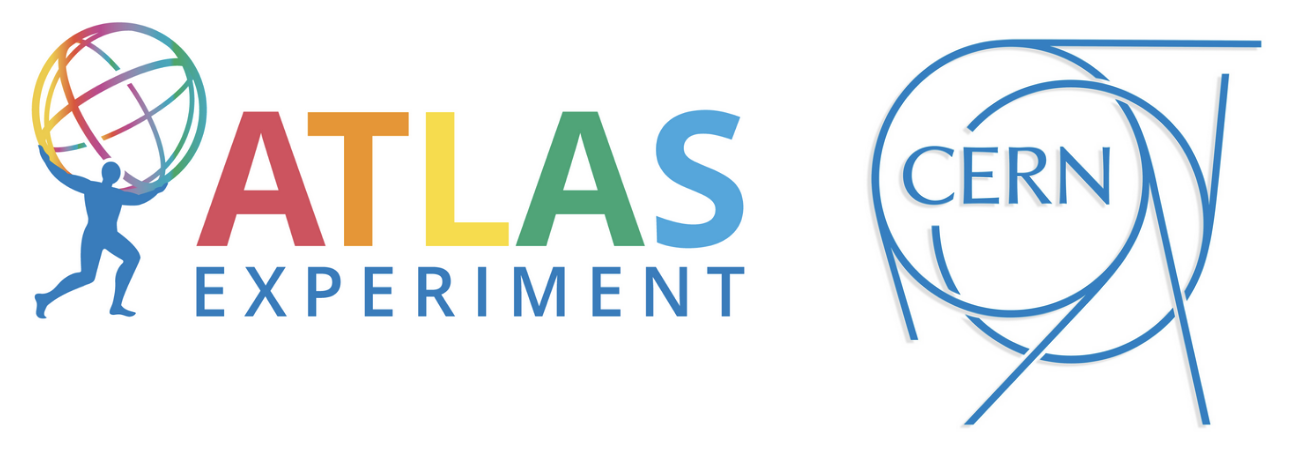

Welcome to the first physics task of the day! Today you will be analysing a tiny fraction of the real data that particle physicists have used to study and observe the famous Higgs boson.
The Higgs boson was discovered in 2012 by the ATLAS and CMS collaborations at CERN, but it was theorised back in the 60s! It took nearly 50 years of technical developments to claim the observation.

Also, it is a very unstable particle, decaying in other lighter particles and leaving different signature in our detectors. In this task we will focus on the decay into a pair of photons: H -> $\gamma \gamma$

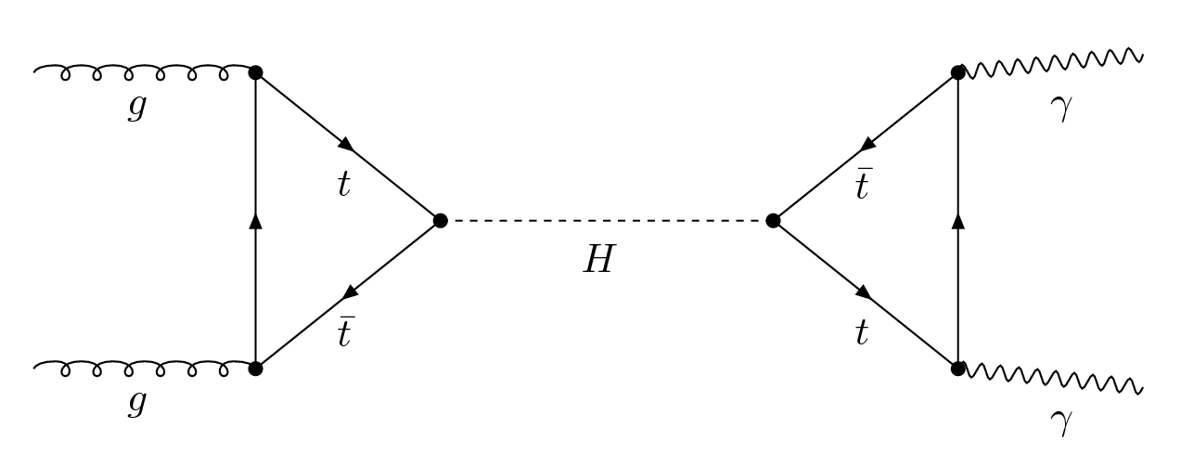

You will perform a data analysis on the real data and simulated samples from the ATLAS collaboration! The first step is to explore our input samples which are available at the following link: [Higgs to photons samples](https://atlas-opendata.web.cern.ch/Legacy13TeV/GamGam/) split into the (real) Data and simulated Monte Carlo (MC) samples.   

In [ ]:
#!/usr/bin/env python
# coding: utf-8
#Only needed if using Google Colab
!pip install uproot
!pip install vector

In [ ]:
#Import the required packages
import numpy as np
import uproot
import awkward as ak
import vector
import matplotlib.pyplot as plt

# Task 1: access particle information in input samples and validation

In these samples, you can access to many particles' properties, like momentum, charge, mass, etc. The best way to deal with this information is registering a vector with the Awkward Array library, a powerful tools for handling jagged or nested data structures, in the following way:

In [ ]:
# Register vector with Awkward
vector.register_awkward()

It is time to access your input samples! You should access the input files with uproot. As an example, you can use:

In [ ]:
#If you are using colab, files can be opened with:
tree_signal = uproot.open("https://atlas-opendata.web.cern.ch/Legacy13TeV/GamGam/MC/mc_343981.ggH125_gamgam.GamGam.root")["mini"] #Simulated H-> $\gamma \gamma$ signal
tree_data = uproot.open("https://atlas-opendata.web.cern.ch/Legacy13TeV/GamGam/Data/data_A.GamGam.root")["mini"] #Real data collected with the ATLAS detector
#If you are using the Physics Jupyter Hub, open the files in this way:
# tree_signal = uproot.open("./CCC-AI-Workshop/Physics-Task1-Input/mc_343981.ggH125_gamgam.GamGam.root")["mini"]
#tree_data = uproot.open("./CCC-AI-Workshop/Physics-Task1-Input/data_A.GamGam.root")["mini"]

where tree_signal and tree_data are reading the information from simulated H->$\gamma \gamma$ and real data samples, respectively. More samples are listed at https://atlas-opendata.web.cern.ch/Legacy13TeV/GamGam/. You can also try different files to the ones that have been provided in the example.

**Remember:** In the simulation, physicists generated a specific process (H->$\gamma \gamma$), while in the real data some other processes may fake the signal you are looking for due to similar signatures.

Once both signal and data samples have been open. You can automatically retrieve the variables or "branches" withing the samples with: branches = tree.keys().

**Have you tried printinting them?** It would be interesting to see which branches are available and if they are the same for both the data and simulated samples!

You can also validate the input samples by checking the branches values. This is a useful check in case the input is corrupted or incorrect. check_branches in the box below, checks the fist value of each branch in the signal tree.

**Can you print the first value of the "runNumber" branch?**


In [ ]:
branches = tree_signal.keys() #Retrieve the variables (aka branches)
#YOUR CODE HERE! Print the branches


check_branches = tree_signal.arrays(library="ak")[:1] #Checks values of the first entry
# YOUR CODE HERE! Print the first entry of the 'runNumber' branch ?

However, manually checking the branch content in this way is not very sustainable but it is a useful validation test.

**Can you print out the runNumber values for the first 5 entries using a for loop?**

**Hint**: runNumber is the first branch in the sample, so you may considering using:

check_branches = tree_signal.arrays(library="ak")[0:k] to speed up things.

Otherwise the code will scan all the branches before printing the desired one.

In [ ]:
#YOUR CODE HERE! adapt check_branches = tree_signal.arrays(library="ak")[:1] to only read the first 5 entries of the 'runNumber' branch

You should be getting the same value for each entry, which is correct as the "runNumber" indicates the unique identifier for a specific sample.

After this useful cross-check, it is good practice to create a list that will have the signal and data trees as element (as you'll be working with both of them). This will reduce the chances of using dangerous copy and paste constructs.

In [ ]:
#Saving the two trees into a single list.
trees_list = [
    tree_signal.arrays(branches, library="ak"), #Element "0" of the list
    tree_data.arrays(branches, library="ak") #Element "1" of the list
]

# Task 2: Reconstructing the Higgs


By now you should have printed out the branches from both the Data and MC samples. The above variables represent the available branches within the given datasets you will be working with. In particle physics, pT, eta, phi and E represent the momentum, angle with respect to the particle beams, azimuthal angle and energy of a given particle.

But, how are you going to "reconstruct" the photons and the Higgs boson from this information? Four Vectors are the answer!

**Four Vectors - What are They Good For?**

- allows reconstruction of complex particles that are not detected in the final state of the detector.

- Provides an intuitive format to calculate observables from simple scalar quantities, such as the invariant mass $m$...
$m^2 = \left( \sum_i E_i \right)^2 - \lvert{ \sum_i \textbf{p}_i\rvert}^2$

$m = \sqrt{(\sum_i{E_i})^2 - \lvert{\sum_i{\textbf{p}_i}\rvert}^2}$

where $E_i$ and $\textbf{p}_i$ are components 0 and 1-3 of the four momentum of the $i$th particle in a system, respectively. It is worth noting that natural units are commonly used in high energy physics, which set the speed of light equal to 1: this simplifies equations when working with 4-vectors and is the standard notation when working with these objects. See https://en.wikipedia.org/wiki/Natural_units for more information.

But how do we build the four vectors? Here is an **incomplete** function that can be useful for this purpose. **Can you finalise the function?**

In [ ]:
def create_photon_vectors(samples, sample_index):
    '''
    Function takes a list of awkward arrays
    (each array corresponding to a dataset or tree) as an input,
    then selects an awkward array based on the sample_index from your list.

    The contents of this array are then used to construct
    arrays of 4-momentum objects, using built-in features
    of the awkward library
    '''
    particle0 = ak.zip(
        {
            "pt": samples[sample_index]["photon_pt"][:, 0], #momentum
            "eta": samples[sample_index]["photon_eta"][:, 0], # beam angle
            "phi": samples[sample_index]["photon_phi"][:, 0], #azimuthal angle
            "E": samples[sample_index]["photon_E"][:, 0]  #energy
        },
        with_name="Momentum4D"
    )
    #YOUR CODE HERE! Create a vector for particle1, similarly to particle0

    return particle0, particle1 #Returns the two particles needed to reconstruct the Higgs boson

# Task 3: Use the function, build your Higgs candidate and plot some ditributions

Once the function is complete, you can build every fundamental ingredient to reconstruct the Higgs boson. But how do you use the function?

create_photon_vectors needs two input parameters (samples and samples_index), **perhaps you can use trees_list and an index from that list to indicate which input sample to use**. Let's only use tree_signal for now.

In [ ]:
#YOUR CODE HERE! Use the function to retrieve the two photons from tree_signal

Since the Higgs boson decays into two photons, the **sum** of the two for each tree should return our beloved Higgs boson and its mass.

In [ ]:
Higgs_candidate = photon_0 + photon_1 #Sum of photon_0 and photon_1 from the function above
Higgs_mass = Higgs_candidate.mass/1e3 #Retrieving the mass of the Higgs boson and do the MeV -> GeV conversion

It's time to plot some distributions! You have a wide choice of variables to plot e.g. Higgs_candidate.pt, Higgs_candidate.eta, Higgs_candidate.phi, Higgs_candidate.mass.

But have you thought about the units of these variables? In particle physics, quantities like momenta, energies, masses are expressed in electronVolts (eV). 1 eV corresponds to 1.6x10E-19 Joules. The quantities in the input samples are expressed in MeV but we usually work with GeV, so you'll need to divide your quantities by 1000.

**Can you produce a distribution like this?** 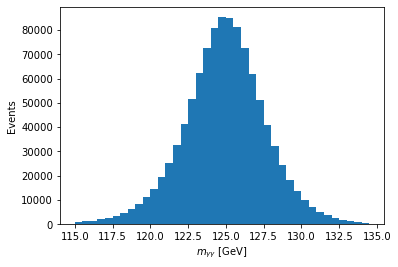

For plotting, you can use matplotlib.pyplot, all you need to do is to define a range on the x-axis and the distribution you would like to plot. We know that the Higgs boson mass is around 125 GeV so maybe you can build. **Can you plot the mass of the Higgs candidate?**  

**Hint: remember to convert the awkward vector to numpy before plotting and the MeV quantities to GeV**.

In [ ]:
#YOUR CODE HERE! Define bins_and_range and label the histogram's axes
plt.hist(ak.to_numpy(Higgs_mass), bins_and_range)
plt.show()

Is the peak of the distribution around the expected mass value? Is it matching the figure above?


## Task 4: Performing the data analysis

Task 3 was about plotting some distributions directly from the input samples. However, in most of the times, additional selection criteria are needed to improve the purity of your samples and reject unwanted events.

To do that, researchers usually apply a sequence of requirements (or cuts) on a single or multiple variables at the same time and check whether the number of signal events is still quite high after the selection.

Selections can look like:

In [ ]:
selected_event = [] #New array to save events passing the selection
for value in input_particle_property:
    if value > 0: #Place here your requirement
        selected_event.append(value) # Save the desired output

Can you adapt the loop above to only retain events in the Higgs mass range between 120 GeV and 130 GeV? Once you have done that, it is always good practice to plot the same distribution after the cut and see if it was successful.

In [ ]:
#YOUR CODE HERE! Apply the selection on the Higgs mass and re-plot the distribution as in the code above

**How many events does your input have and which fraction of events was removed?**

Statistical analyses need large amounts of data to be successful. How large? Let's find out!

The size of a dataset is closely associated with the statistical uncertainty of some feature of said dataset. What this means is we need to know how many events we observe to accurately describe the physics that happens in an experiment.

Here is an example on how to count the number of events:

In [ ]:
#Number of events before applying any requirements
number_events_precut = len(Higgs_candidate.mass)
print(number_events_precut)

How can you evaluate the number of events **after** the cut and the fraction of events that were removed?

In [ ]:
#YOUR CODE HERE! calculate the number of events after the cut and the fraction of removed events

## Task 5: Apply the same requirement on the data and plot the Higgs mass distributions for both signal and data after the requirements

So far you have only worked with the signal tree, does the Higgs mass distribution look the same in the data tree? Let's find out!

You can re-use the create_photon_vectors function and reconstruct the Higgs mass from that tree.

**Important: Remember to use different names for the new variables**

In [ ]:
#YOUR CODE HERE! Use create_photon_vectors function from tree_data, build the Higgs boson from the data two photons and plot the distribution

Are the signal and data distributions different? Do you know why?

##Bonus task: Using Masks to apply multiple selections at the same time

If you want to apply several cuts at the same time directly on the input sample, `Masks` are reusable data filters that allow the alteration/retention/removal of particular data given a selection criterion - this makes them an invaluable tool for streamlining code. While you can accomplish everything a mask can produce using for loops and if statements, masks significantly reduce computationally time.
Performing columnar analysis (using masks to operate on entire branches at a time) is one of the major reasons doing data analysis in python works so well, so it may be worth gettig used to for the time being :-)

Mask example:

In [ ]:
selection_masks = [
    (tree["photon_n"] >= n_gamma_min) &  #number of photons required in the event
    (ak.any(tree["photon_pt"] > gamma_pt_min, axis=-1)) &
    (tree["photon_isTightID"] == photon_isTightID) &
    for tree in trees_list
]

# Flatten each mask into a single boolean array
flattened_masks = [ak.all(mask, axis=-1) for mask in selection_masks]

where `photon_isTightID` is a Boolean which corresponds to whether a reconstructed photon passes a certain list of criteria or not. The details of how the value of `photon_isTightID` is beyond the scope of this workshop, but know that a photon classified as is $\textit{less likely}$ to be an incorrectly reconstructed particle, e.g. a jet misidentified as a photon.

**Can you think of which values can n_gamma_min, gamma_pt_min, photon_isTightID should assume?** Hint: Plot the distributions of each variable from the input samples and define the optimal mask.

In [ ]:
# Counting events before mask selection
num_events_tree1_precut = len(flattened_masks[0])
num_events_tree2_precut = len(flattened_masks[1])

# Example: counting events after mask selection
num_events_tree1_postcut = np.sum(flattened_masks[0])
num_events_tree2_postcut = np.sum(flattened_masks[1])

**How many events are surviving your mask selection?**